## 8.1 Proving and disproving hypotheses

This session considers the concept of testing hypotheses. Let's consider a very simple example. Suppose we believe that all men are over 120cm tall. We could:
- *Prove* the hypothesis by finding every man and showing they are more than 120cm tall
- *Disprove* the hypothesis by finding a single man less than 120cm tall

> It is easier to find evidence against a hypothesis than to prove it to be correct.  

The general approach we will take is as follows. We start with a **null hypothesis**, which is typically a statement about the population value of parameters. This will often be a statement of "no difference". Some examples might be: 

- Exposure to passive smoking is not associated with subsequent risk of lung cancer.
- Treatment A does not improve survival compared with placebo
- The mean body mass index (BMI) in England is the same as the mean BMI in Scotland.

We assume that our null hypothesis holds, i.e. that our sample of data came from a population in which our null hypothesis is true. We then look for evidence, in our sample data, against the null hypothesis (i.e. to falsify the hypothesis). 

For example, suppose our null hypothesis is that the mean BMI is the same in England and Scotland and that we have a random sample of adults from England and Scotland. If we assume our null hypothesis is true (the two populations have the same mean BMI), then we would expect our two samples to have similar means. If, in fact, we observed very different sample means in the two sample groups then we would take this as *evidence against our null hypothesis*.


### 8.1.1 Example: Emotional distress in violence researchers

To explore the concept of hypothesis testing, we will return to the example of emotional distress among violence researchers. The researchers were randomly assigned to receive an intervention (group debriefing aimed at reducing emotional distress) or control (nothing). At the end of the intervention, 22 researchers in the intervention group and 26 researchers in the control group filled in a questionnaire measuring emotional distress. The score gives a value of 0-20, with higher scores indicating higher distress. 

The sample mean scores and their standard deviations in the two groups are:

* Control group ($n_0$=26), sample mean emotional distress score (sample standard deviation):  $\bar{x}_0 = 6.35$, (SD = 1.87)
* Intervention group ($n_1$=22), sample mean emotional distress score (sample standard deviation):  $\bar{x}_1 = 5.45$, (SD = 1.87)

The research question we consider in this session is:

> Is the true mean emotional distress score is different in the intervention and control group?

The population parameter of interest is therefore the difference between the population mean emotional distress score in the intervention and control groups.  

Aside: as is often the case, the population is a bit hard to define here. We can think about it as being the wider population of people who could be given the intervention (or not).


The code below reads in the data, obtains the sample means and SDs and draws histograms of the scores in each group. 

[1] "Sample means: "


[1] 6.346154

[1] 5.454545

[1] "Sample SDs: "


[1] 1.874936

[1] 1.87025

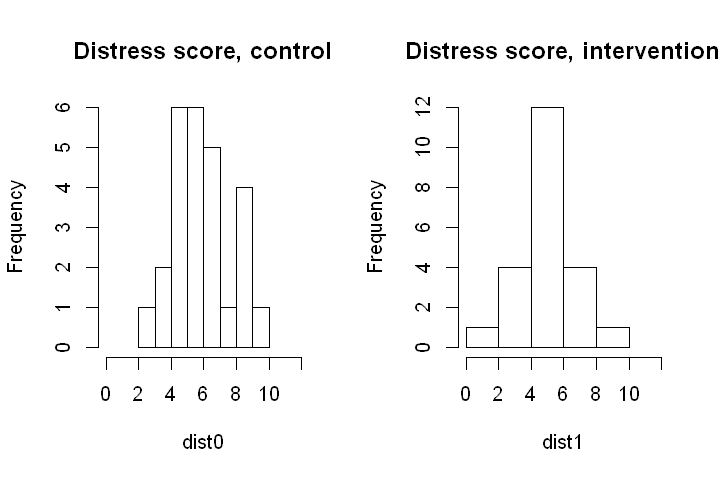

In [2]:
# Read in data (emotional distress scores in control and intervention group)
dist0 <- c(5, 2, 5,  7,  6,  7,  7,  5,  8,  6,  6,  9,  4,  5,  9,  7,  9,  5,  6, 10,  9,  4,  6,  6,  5,  7)
dist1<- c(5,  5,  6,  6, 1,  5, 10,  7,  3,  6,  7,  8,  6,  7,  5,  4,  5,  6,  4,  6,  3,  5)

# Calculate sample means 
print("Sample means: ")
mean(dist0)
mean(dist1)

# Calculate sample standard deviations 
print("Sample SDs: ")
sqrt(var(dist0))
sqrt(var(dist1))

# Draw histograms of the scores in each group
options(repr.plot.width=6, repr.plot.height=4)
par(mfrow=c(1,2))
hist(dist0, main="Distress score, control", xlim=c(0, 12))
hist(dist1, main="Distress score, intervention", xlim=c(0, 12))

### 8.1.2 Statistical model

We will let $Y_{0,1}, ...,Y_{0,26}$ be random variables representing the emotional distress scores of the 26 sampled researchers in the control group and $Y_{1,1}, ...,Y_{1,22}$ be random variables representing the emotional distress scores of the 22 sampled researchers in the intervention group. So the first subscript denotes the group (0=control, 1=intervention) and the second is an index for the person (i=1, ..., 26 in the control group; i=1,...,22 in the intervention group).

We will let $y_{0,1}, ...,y_{0,26}$ and $y_{1,1}, ...,y_{1,22}$ represent the realised values of these random variables (i.e. the observed emotional distress scores).  

We will assume that all random variables are independent of each other. The emotional distress scores in the control group are all drawn from the same normal distribution, with population mean $\mu_0$ and population standard deviation  $\sigma$. For now, we suppose $\sigma$ is a known value, with $\sigma = 1.75$. The emotional distress scores in the intervention group are assumed to be drawn from a normal distribution with population mean $\mu_1$ and the same population standard deviation.  

This model can be compactly written as follows

$$ 
Y_{j,i} \overset{\small{iid}}{\sim} N(\mu_j, 1.75^2), \qquad i=1,2,...,n_j
$$

The population parameter we are interested in is

$$
\delta = \mu_1 - \mu_0
$$

The obvious estimator for this is the sample difference in means

$$
\hat{\delta} = \bar{Y_1} - \bar{Y_0} = \frac{1}{n_1} \sum_{i=1}^{n_1} Y_{1,i} - \frac{1}{n_0} \sum_{i=1}^{n_0} Y_{0,i}
$$

And the sample estimate is:

$$
\bar{y_1} - \bar{y_0} = \frac{1}{n_1} \sum_{i=1}^{n_1} y_{1,i} - \frac{1}{n_0} \sum_{i=1}^{n_0} y_{0,i}
$$



### 8.1.3  The null hypothesis

The **null hypothesis** is that there is no difference in the population mean emotional distress score in the intervention and control groups. Formally, we write:

$$
H_0:  \delta = 0
$$

The **alternative hypothesis** (sometimes written $H_1$ or $H_A$) is that the null hypothesis is not true:

$$
H_1: \delta \neq 0
$$

In our sample, we have seen that $\hat{\delta} = -0.892$. So the sample mean emotional distress score is lower in the intervention group (which is the direction we might be hoping for, since this group have received a form of counselling to reduce their emotional distress). However, the two sample means are very unlikely to be exactly equal, even if the true mean emotional distress score is the same in the two groups, due to sampling variability (i.e. due to random chance). So how should we interpret this sample difference in means? Does it constitute evidence against our null hypothesis? 

In order to answer this question, we need to consider the sampling distribution of the difference in means. Unlike in previous sessions, where we used the sampling distribution to obtain confidence intervals, we are now interested in a subtly different sampling distribution: the sampling distribution that we would see *if the null hypothesis were true*. 

### 8.1.4 Sampling distribution for the difference in sample means

Under the statistical models above, if $\sigma$ is a known value it is straightforward to derive the sampling distribution of the estimator (the difference in sample means between groups). 

> Linear combinations of independent normal distributions are also normal

Thus the distribution of $\hat{\delta}$ is normal. We can then calculate its expectation and variance using techniques from the Maths Refresher to obtain:

$$
\hat{\delta} \sim N\left(\delta, \sigma^2 \left(\frac{1}{n_1} + \frac{1}{n_0} \right) \right)
$$


Substituting in the values $\sigma = 1.75$, $n_0 = 26$ and $n_1 = 22$, we have

$$
\hat{\delta} \sim N\left(\delta, 1.75^2 \left(\frac{1}{22} + \frac{1}{26} \right) \right) = N(\delta,  0.507^2)  
$$

So the expectation of the sampling distribution is the true population value $\delta$ and the standard error is $0.507$. Remember that because we are considering the distribution of an estimator, we call the standard deviation of the estimator (the square root of the variance) the standard error. 


### 8.1.5 Sampling distribution under the null hypothesis

We are interested in the distribution of the difference in sampling means would look like under repeated sampling *if the null hypothesis were true*. The null hypothesis states that $\delta = 0$. Therefore, under the null hypothesis, 

$$
\hat{\delta} \sim  N(0,  0.507^2) 
$$


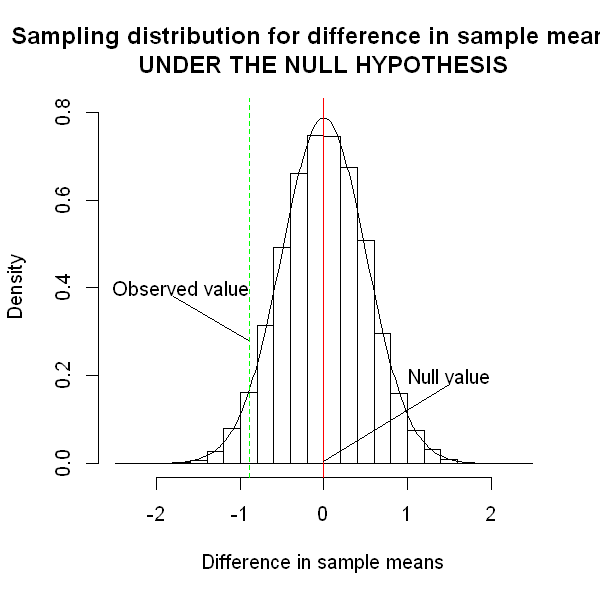

In [3]:
# Sample difference in means
delta.hat <- mean(dist1) - mean(dist0)

# Randomly generate 10000 sample differences in means (following the sampling distribution under the null hypothesis)
sample.diff.means <- rnorm(10000, 0, 0.507)

# Draw the approximate sampling distribution with the percentile confidence limits marked in red
options(repr.plot.width=5, repr.plot.height=5)
hist(sample.diff.means, freq=FALSE, main="Sampling distribution for difference in sample means, \nUNDER THE NULL HYPOTHESIS", xlab="Difference in sample means", xlim=c(-2.5, 2.5), ylim=c(0, 0.8))
lines(seq(-2.5, 2.5, 0.025), dnorm(seq(-2.5, 2.5, 0.025), 0, 0.507))
abline(v=0, col="red")
abline(v=delta.hat, col="green", lty=2)

text(1.5, 0.2, "Null value")
text(-1.7, 0.4, "Observed value")
lines(c(0, 1.5), c(0.005, 0.18))
lines(c(-1.8, -0.9), c(0.38, 0.28))

The sampling distribution above shows us the distribution of the differences in sample means that we could have seen under repeated sampling, i.e. if we had done the same study a very large number of times. The question we must ask now is: is the value we have seen consistent with this sampling distribution? Or is it surprising? A "surprising" result is taken as evidence against the null hypothesis. In order to clarify these ideas, consider two scenarios that could have happened.

Scenario 1: Suppose we had done exactly the same study, but had seen a difference in sample means of $\hat{\delta} = -3.5$ (i.e. the intervention group sample mean score was 3.5 units lower than the control group mean). 

Scenario 2: Suppose we had done this study, but had actually seen a difference in sample means of $\hat{\delta} = 0.02$. 

What would we conclude in these scenarios? The histogram above is shown below for the two scenarios. 

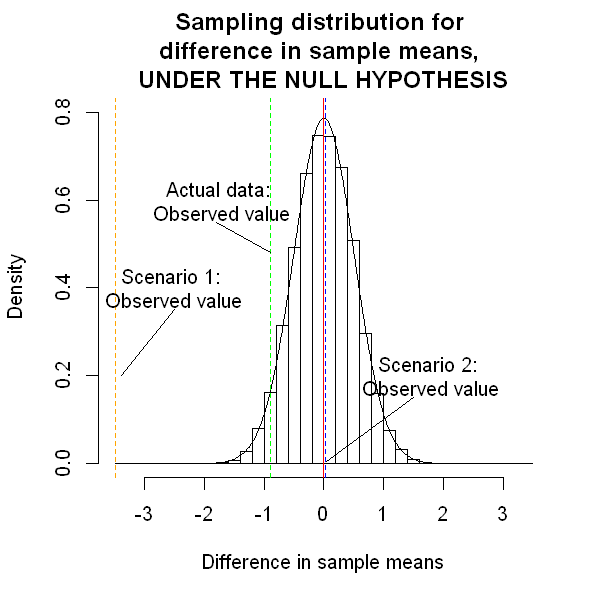

In [7]:
# Draw the approximate sampling distribution with the percentile confidence limits marked in red
options(repr.plot.width=5, repr.plot.height=5)
hist(sample.diff.means, freq=FALSE, main="Sampling distribution for \ndifference in sample means, \nUNDER THE NULL HYPOTHESIS", xlab="Difference in sample means", ylim=c(0, 0.8), xlim=c(-3.5, 3.5))
lines(seq(-3.5, 3.5, 0.025), dnorm(seq(-3.5, 3.5, 0.025), 0, 0.507))
abline(v=0, col="red")
abline(v=delta.hat, col="green", lty=2)
abline(v=-3.5, col="orange", lty=2)
abline(v=0.02, col="blue", lty=2)

text(-2.5, 0.4, "Scenario 1: \nObserved value")
text(1.8, 0.2,  "Scenario 2: \nObserved value")
text(-1.7, 0.6, "Actual data: \nObserved value")
lines(c(0.05, 1.5), c(0.005, 0.15))
lines(c(-2.5, -3.4), c(0.35, 0.2))
lines(c(-1.8, -0.9), c(0.55, 0.48))

**Scenario 1** We can see from the histogram that, under the null hypothesis, the probability of seeing a difference in sample means of -3.5 or less is incredibly low. In fact, this probability is less than 1 in 10,000. So if we did 10,000 studies we would expect only one of them to have a difference in sample means of -3.5 or less. 

- So, have we been very unlucky and picked a very very unusual sample by chance? 
- Or is our initial premise incorrect? Is the null hypothesis wrong? 

This particular sample mean difference appears to be inconsistent with our null hypothesis. We interpret these "surprising" sample statistics as evidence against the null hypothesis.

**Scenario 2** Again, the histogram shows quite clearly that, under the null hypothesis, many of the samples that we could have obtained would give us a sample mean difference close to zero. So this sample difference is completely consistent with the null hypothesis. 

In this case, we would conclude that there is no evidence against the null hypothesis.

**Our actual observed data** Our observed sample mean difference (-0.892) is somewhere in between. In fact, we can calculate the probability of observing a sample mean difference of -0.892 or lower (i.e. the proportion of the area of the histogram that lies to the left of -0.89): this turns out to be 4%. So under repeated sampling, if our null hypothesis is true and there is truly no difference between the mean emotional distress score in the intervention and control groups, then we would expect to see a difference at least this big 4% of the time. 

In fact, we typically consider the proportion of samples in which we would get an estimate at least as extreme as the one we did get *in either direction*. In our case, this is the probability of seeing a sample mean difference of less than -0.892 or greater than +0.892. Under the null hypothesis, approximately 8% of samples would produce a sample mean difference at least as extreme as the one we have seen in our sample. 

So we had around a 1 in 13 chance of ending up with this result, if the null hypothesis is true. We interpret this as  weak evidence against the null hypothesis.
